In [1]:
import pandas as pd
import numpy  as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\Acer\Downloads\avocado.csv\avocado.csv")

In [4]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [5]:
df.shape

(18249, 14)

In [6]:
#dropping column that is not useful.
df.drop('Unnamed: 0',axis=1,inplace=True)

In [7]:
df.shape

(18249, 13)

Number of Rows: 18249
Number of Columns: 13

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


There are three types of datatypes: float64, int64,object

In [9]:
# Here Date column is shows object dtype. It has to be converted into Datetime data type.
df['Date']=pd.to_datetime(df['Date'])

In [10]:
#extracting month from Date column
df['Month']=pd.to_datetime(df['Date']).dt.month

In [11]:
#extracting day from Date colunn
df['day'] = pd.to_datetime(df['Date']).dt.day

In [12]:
df.drop('Date',axis=1,inplace=True)

In [13]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
Month             int32
day               int32
dtype: object

## Checking Null Values

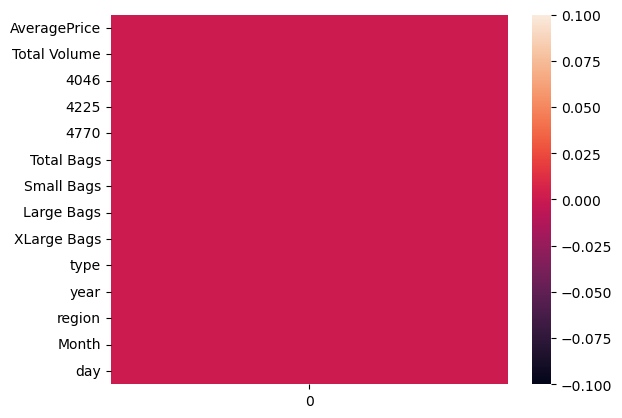


Null Values Count:
 AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
Month           0
day             0
dtype: int64


In [14]:
#we can see  Null values through Heatmap.

sns.heatmap(df.isnull().sum().to_frame())
plt.show()
print('\nNull Values Count:\n', df.isnull().sum())

## Exploratory Data Analysis

In [15]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'Month', 'day'],
      dtype='object')

In [16]:
df['type'].value_counts()

type
conventional    9126
organic         9123
Name: count, dtype: int64

In [17]:
# convert categorical value to numerical 
value_map={'conventional':0,'organic':1}
df['type']=df['type'].map(value_map)

In [18]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,Albany,11,29


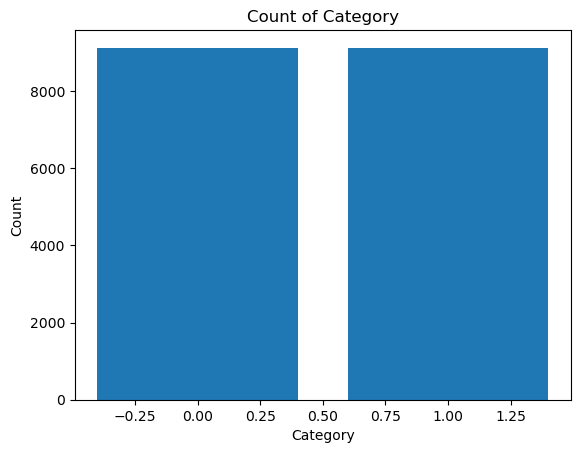

In [19]:
category_counts = df['type'].value_counts()

plt.bar(category_counts.index, category_counts.values)

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Category')

plt.show()

In [20]:
df['type'].value_counts()

type
0    9126
1    9123
Name: count, dtype: int64

We can visualise that both categories have same percentage of data.

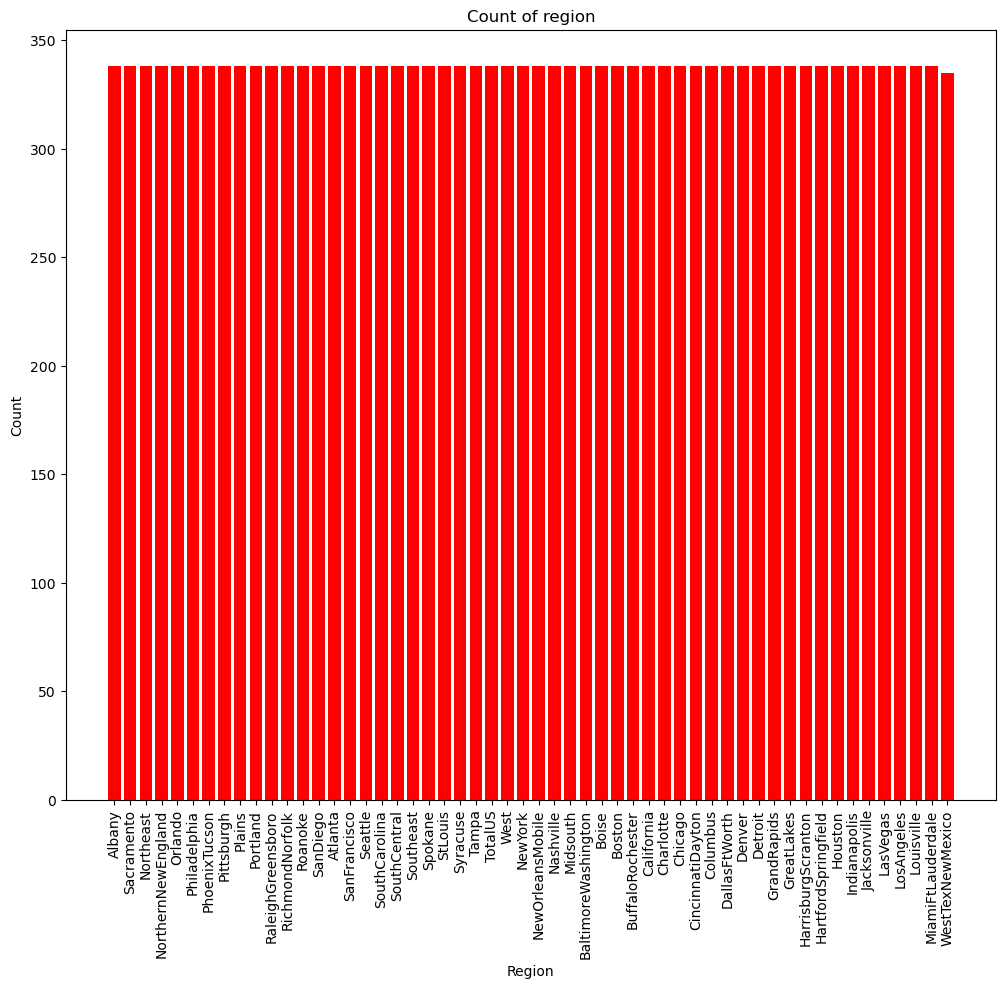

In [21]:
regions=df['region'].value_counts()
plt.figure(figsize=(12,10))
plt.bar(regions.index, regions.values, color='r' )
plt.xticks(rotation='vertical')
plt.xlabel('Region')
plt.ylabel('Count')
plt.title('Count of region')
plt.show()

Comment- We can visualise from above graph that all regions have equal ratio of data.

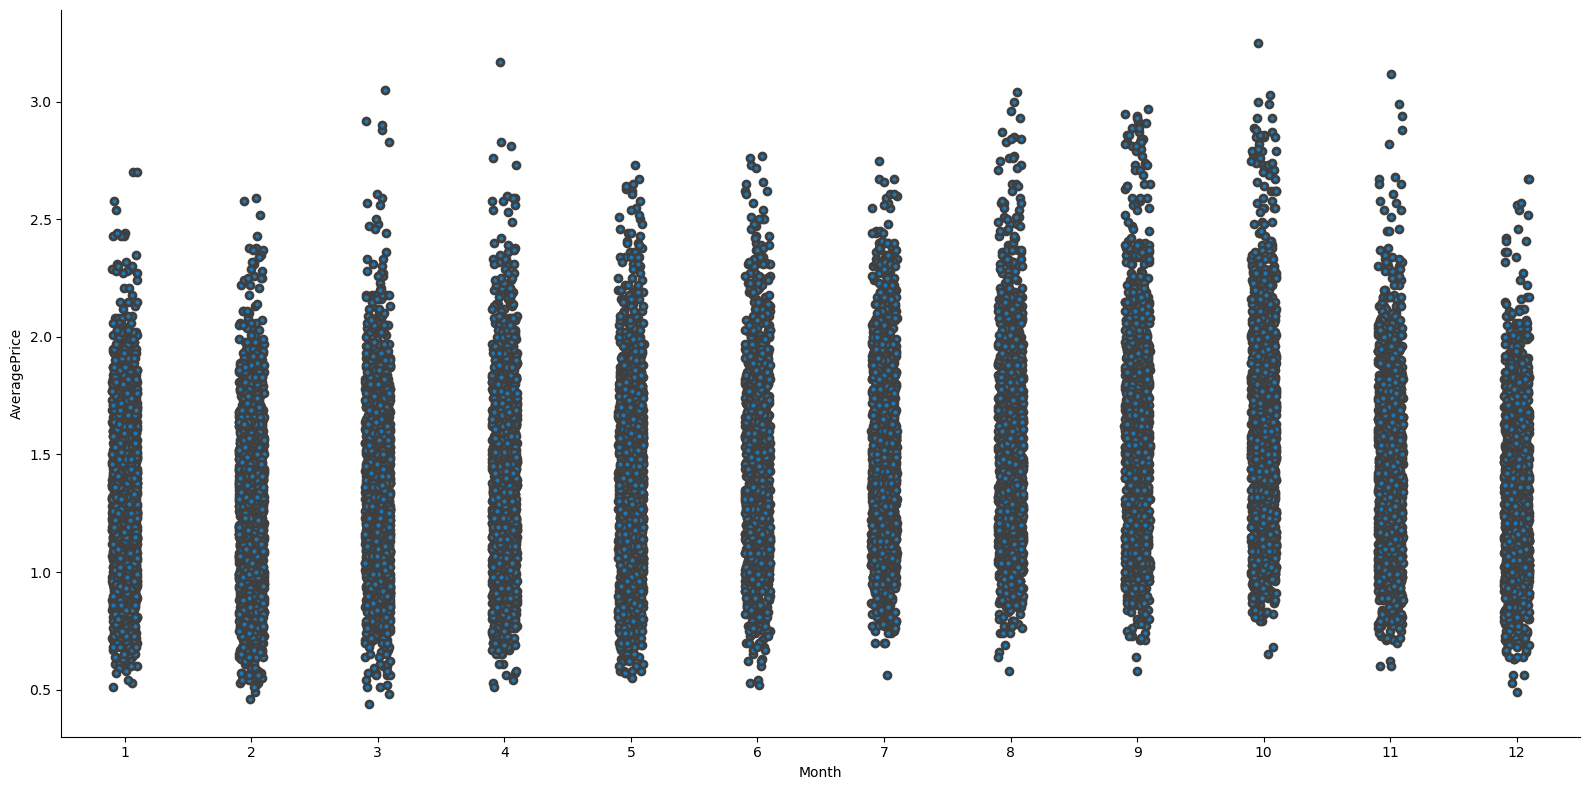

In [22]:
# Relationship between Average Price and month
sns.catplot(x = "Month", y = "AveragePrice", kind="strip",data=df,height=8, linewidth=2, aspect=2.)

Comment- Here we can see that October and November AveragePrice is higher than usual.

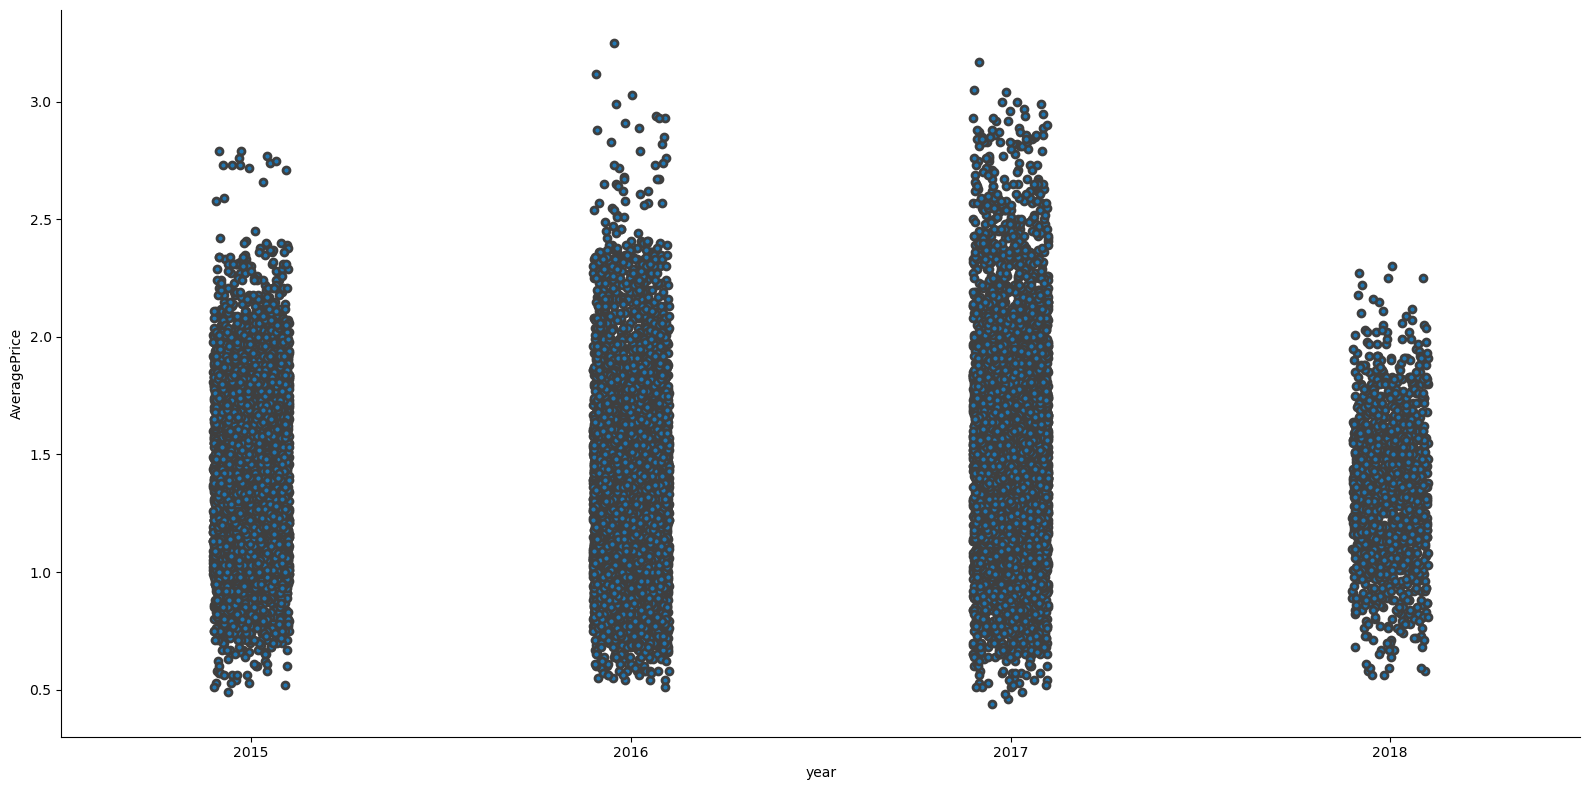

In [23]:
# Relationship between Average Price and year
sns.catplot(x = "year", y = "AveragePrice", kind="strip",data=df,height=8, linewidth=2, aspect=2.)

Comment- Here we can see that in 2017 AveragePrice is higher than usual years. and in year 2018 is decreased.

## Label encoding of Region Column

In [25]:
from sklearn.preprocessing import LabelEncoder

df['region'] = LabelEncoder().fit_transform(df['region'])

Comment - we have converted region column from categorical to Numeric value

## Statistical Analysis

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
type,18249.0,0.499918,5.000137e-01,0.00,0.00,0.00,1.00,1.00


<Axes: >

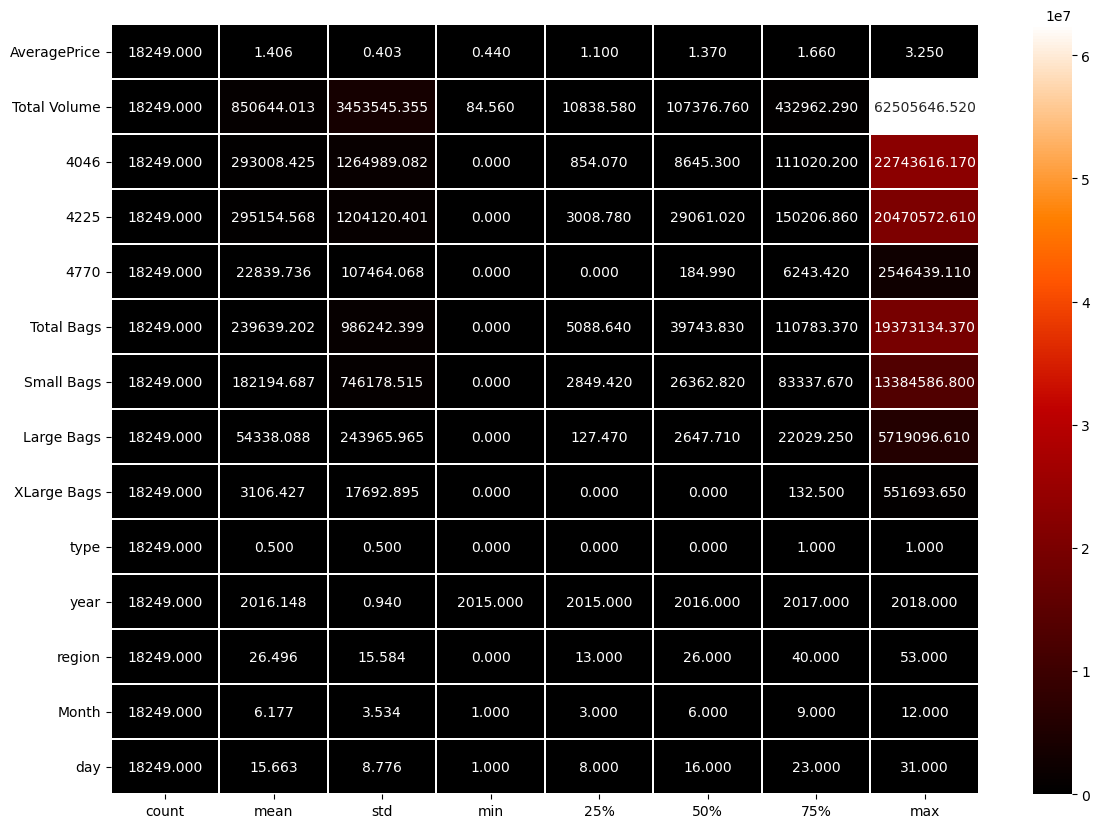

In [27]:
plt.figure(figsize=(14,10))
sns.heatmap(df.describe().T,linewidth=0.3,fmt='0.3f' ,annot=True,cmap='gist_heat')

Comment-
Statistical analysis reveals right skewness in feature distributions. Consistent counts signify a complete dataset. Potential outliers, especially in 'Total volume','4225', '4046' and 'Total Bags' warrant attention. Heatmap highlights the need for feature scaling.

## Outlier Detection

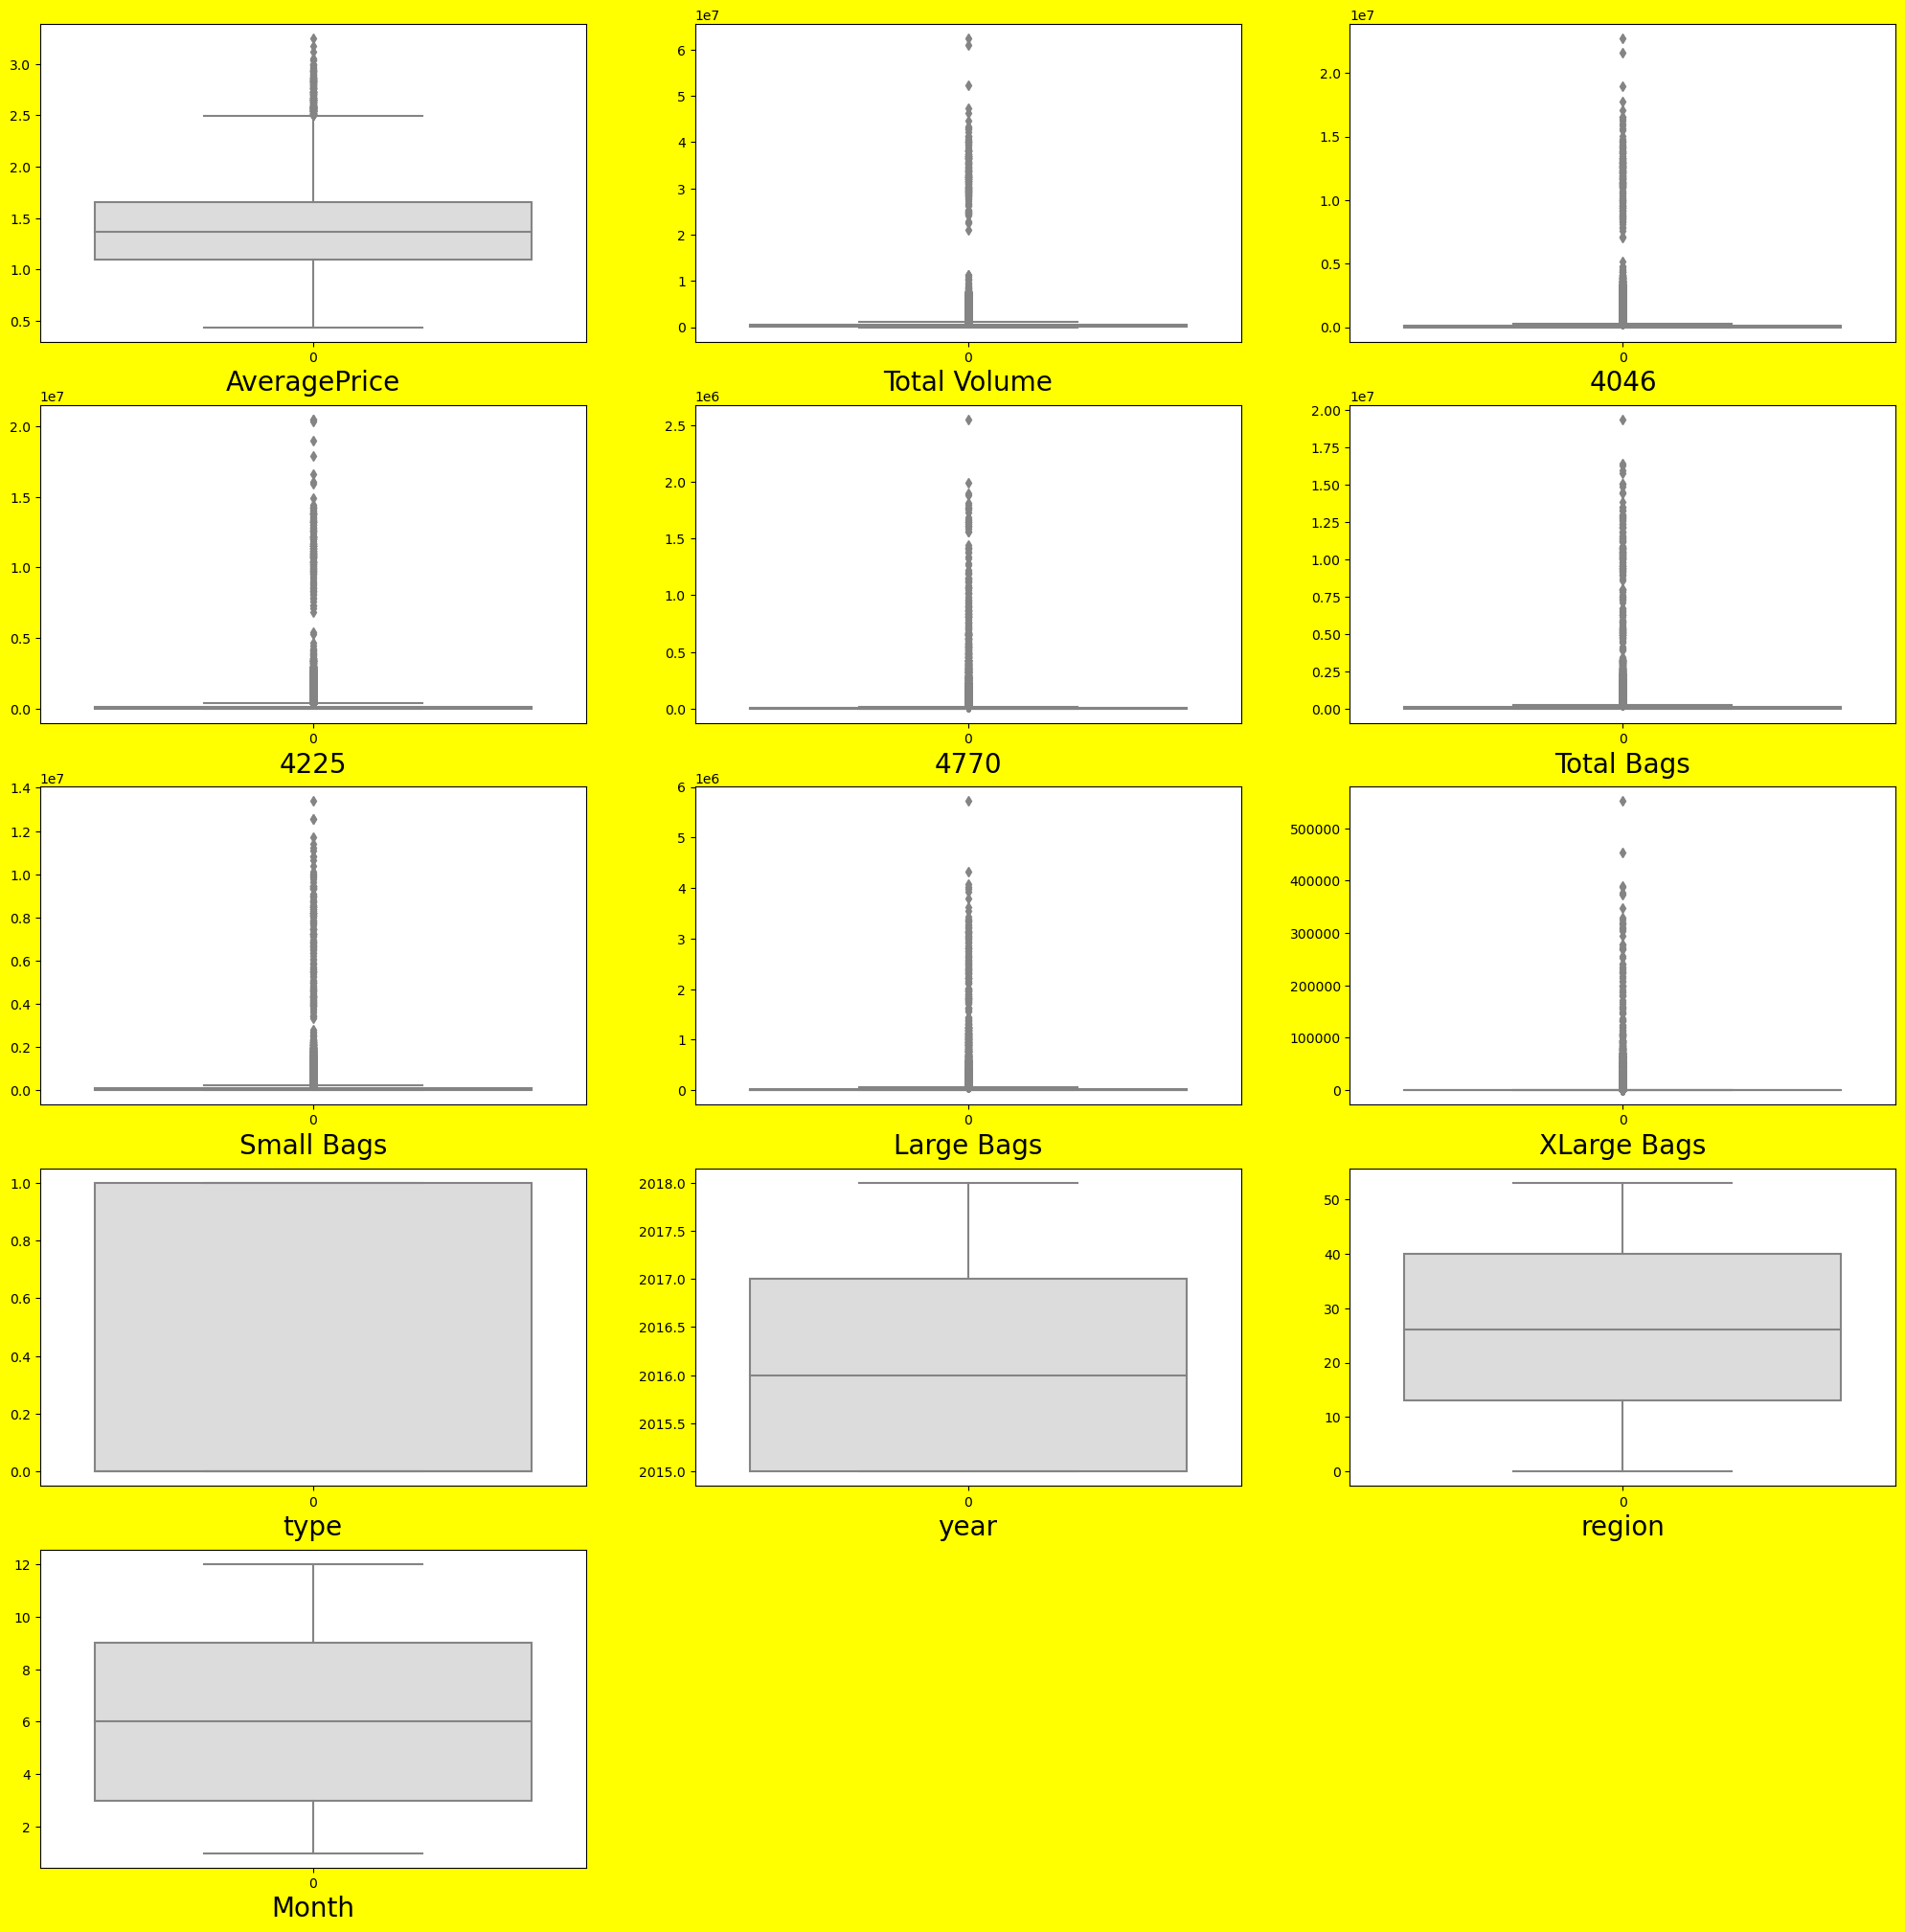

In [28]:
plt.figure(figsize=(25,25),facecolor='yellow')
index=1
for column in df:
    if index <=13:
        ax = plt.subplot(5,3,index)
        sns.boxplot(df[column], palette='coolwarm')
        plt.xlabel(column,fontsize=20)
    index+=1
plt.show()

Comment -
we can see that there is Outliers in ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags','Small Bags', 'Large Bags', 'XLarge Bags']

Reason is that Data is not scaled.

## Removing of outliers

In [29]:
from scipy.stats import zscore

# Specify the columns to remove outliers
columns_to_remove_outliers = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

# Calculate z-scores for each specified column
z_scores = df[columns_to_remove_outliers].apply(zscore)

# Set a threshold for z-scores (e.g., 3)
threshold = 3

# Remove rows with z-scores beyond the threshold in any specified column
df1 = df[(z_scores.abs() < threshold).all(axis=1)]

In [30]:
#Shape after removing outliers
print('Shape of dataset after removing outliers :', df1.shape)

Shape of dataset after removing outliers : (17782, 14)


In [31]:
#Data Loss
print('Percentage Data Loss :',((18249-17782)/18249)*100,'%')

Percentage Data Loss : 2.55904433119623 %


## Checking Skewness of dataset

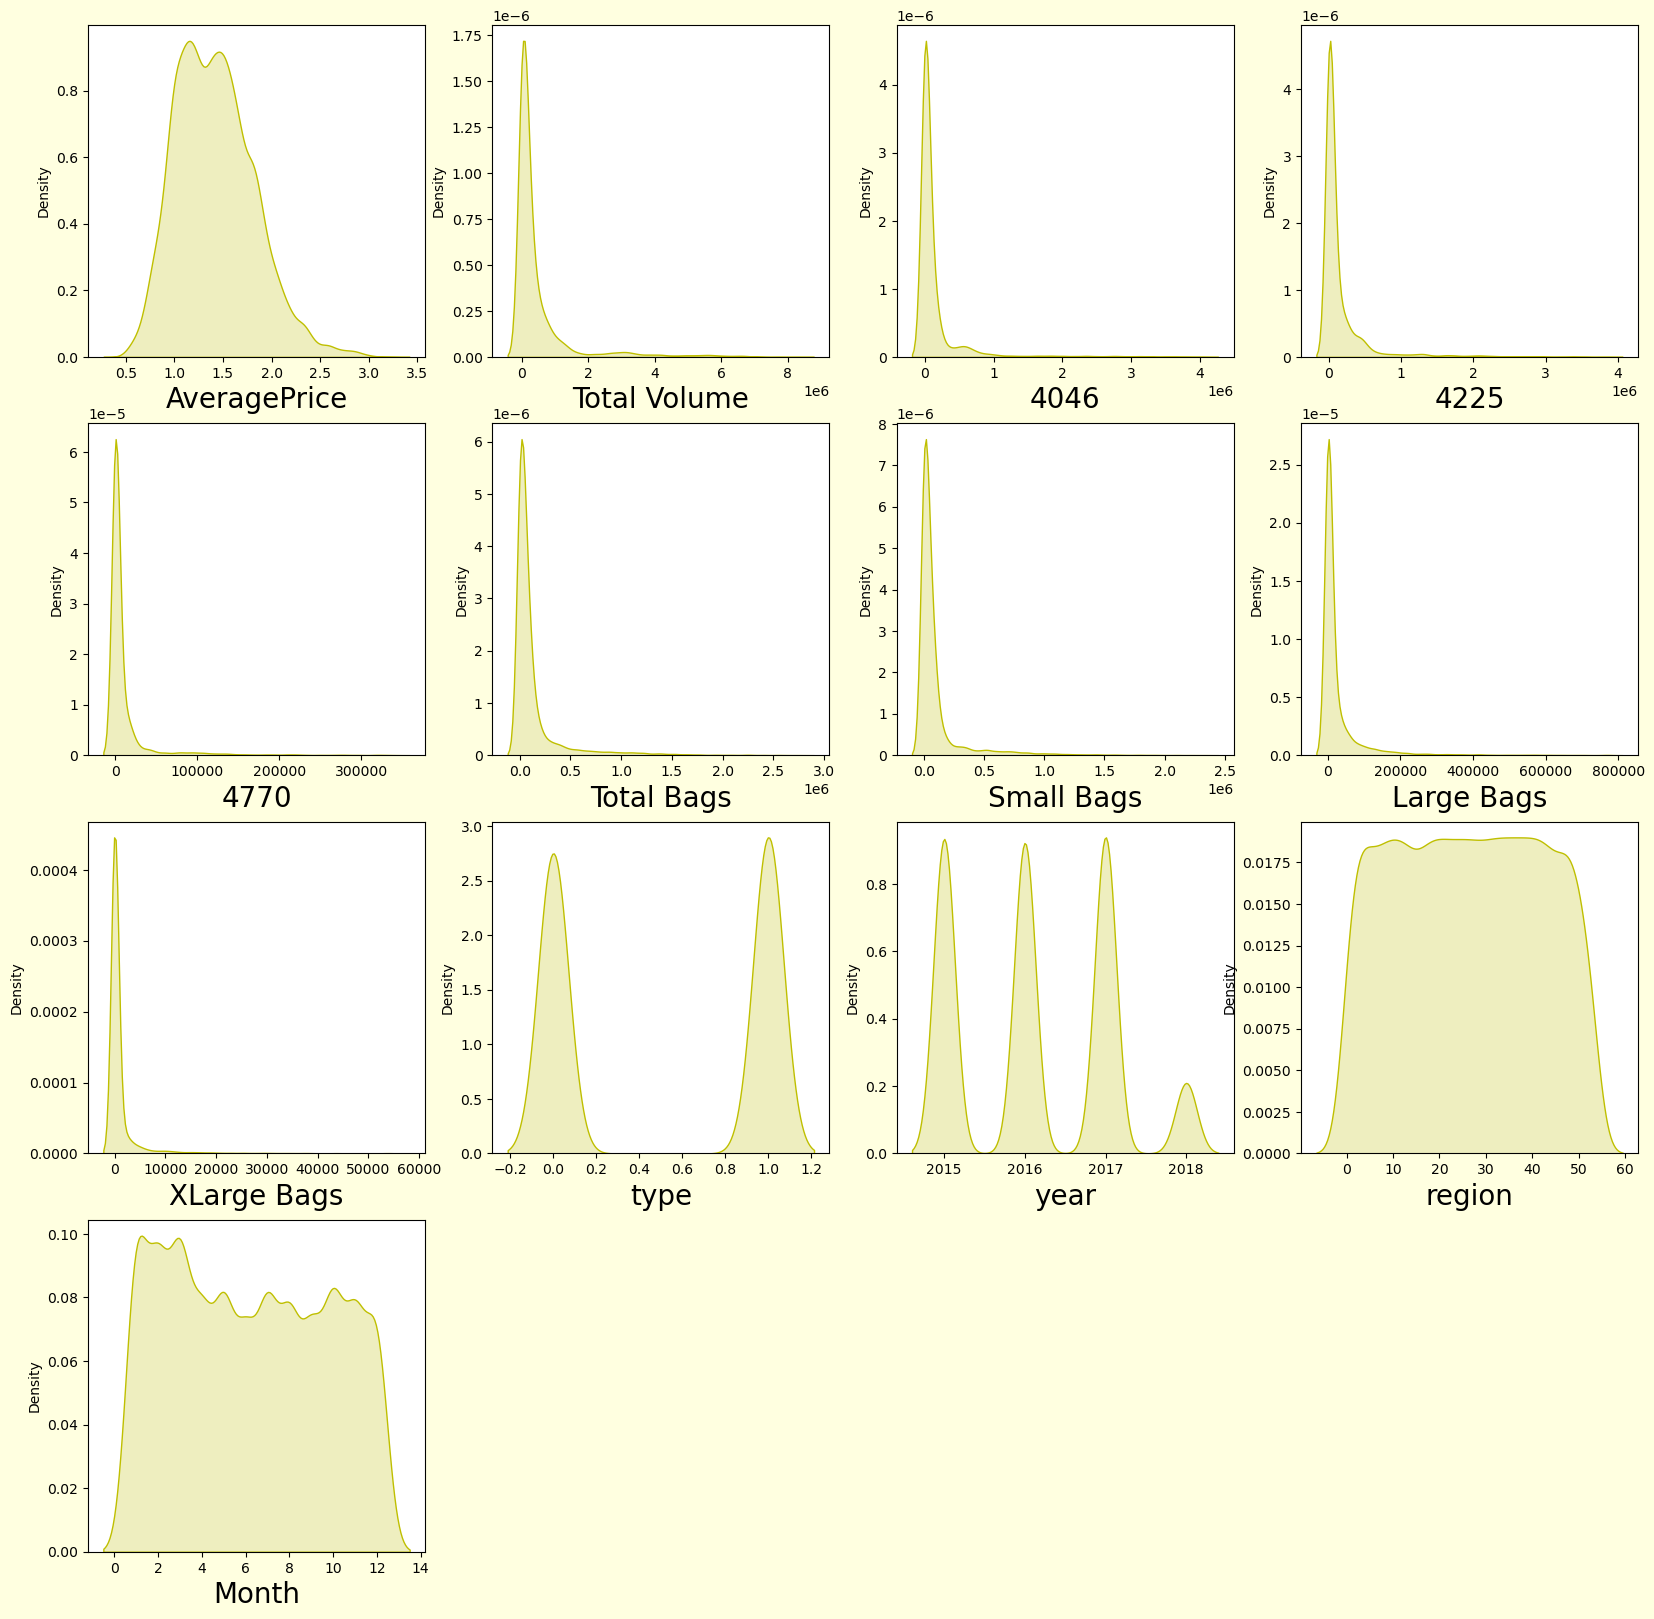

In [32]:
plt.figure(figsize=(20,25), facecolor='lightyellow')
plotnumber=1
for column in df1:
    if plotnumber <=13:
        ax = plt.subplot(5,4,plotnumber)
        sns.distplot(df1[column], color='y',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [33]:
df1.skew()

AveragePrice    0.560969
Total Volume    3.782060
4046            4.928850
4225            4.472729
4770            5.137120
Total Bags      4.082103
Small Bags      4.238647
Large Bags      5.072468
XLarge Bags     6.159391
type           -0.052210
year            0.220792
region          0.005773
Month           0.098217
day             0.011251
dtype: float64

Comment -

1. Optimal range for skewness is -0.5 to 0.5.
   
2. 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags'and 'XLarge Bags' are positively Skewed in nature, need to transform.

## Removing Skewness of Dataset using the LOGARITHMIC Transformation.

Applying the logarithmic transformation tends to compress higher values more than lower values, helping to reduce right skewness.

In [ ]:
column_name = ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

# Log transformation
df1[column_name] = np.log1p(df[column_name])


In [35]:
#checking skewness after removing of skewness
df1.skew()

AveragePrice    0.560969
Total Volume   -0.039041
4046           -0.408827
4225           -0.595360
4770            0.079074
Total Bags     -0.394347
Small Bags     -0.782875
Large Bags     -0.603830
XLarge Bags     1.225926
type           -0.052210
year            0.220792
region          0.005773
Month           0.098217
day             0.011251
dtype: float64

Skewness of dataset is shorted.

## Correlation of Dataset

<Axes: >

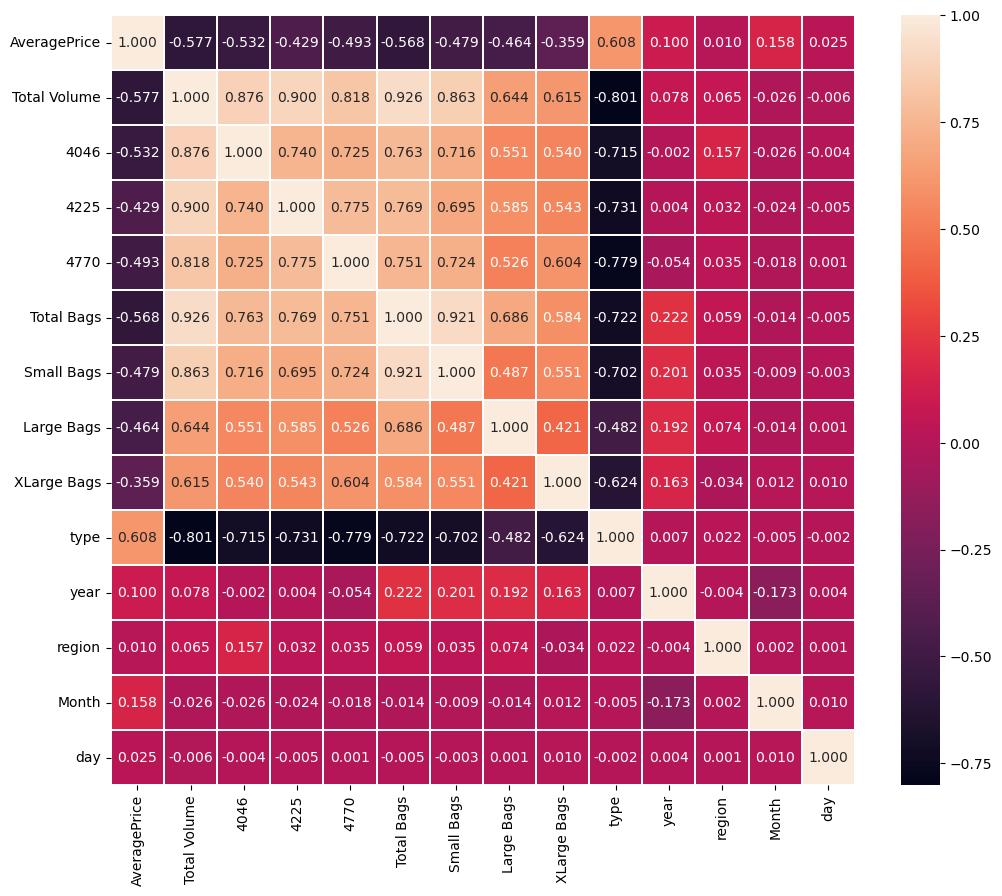

In [36]:
# we can analyse correlation through heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df1.corr(),linewidth=0.1,fmt='0.3f',annot=True)

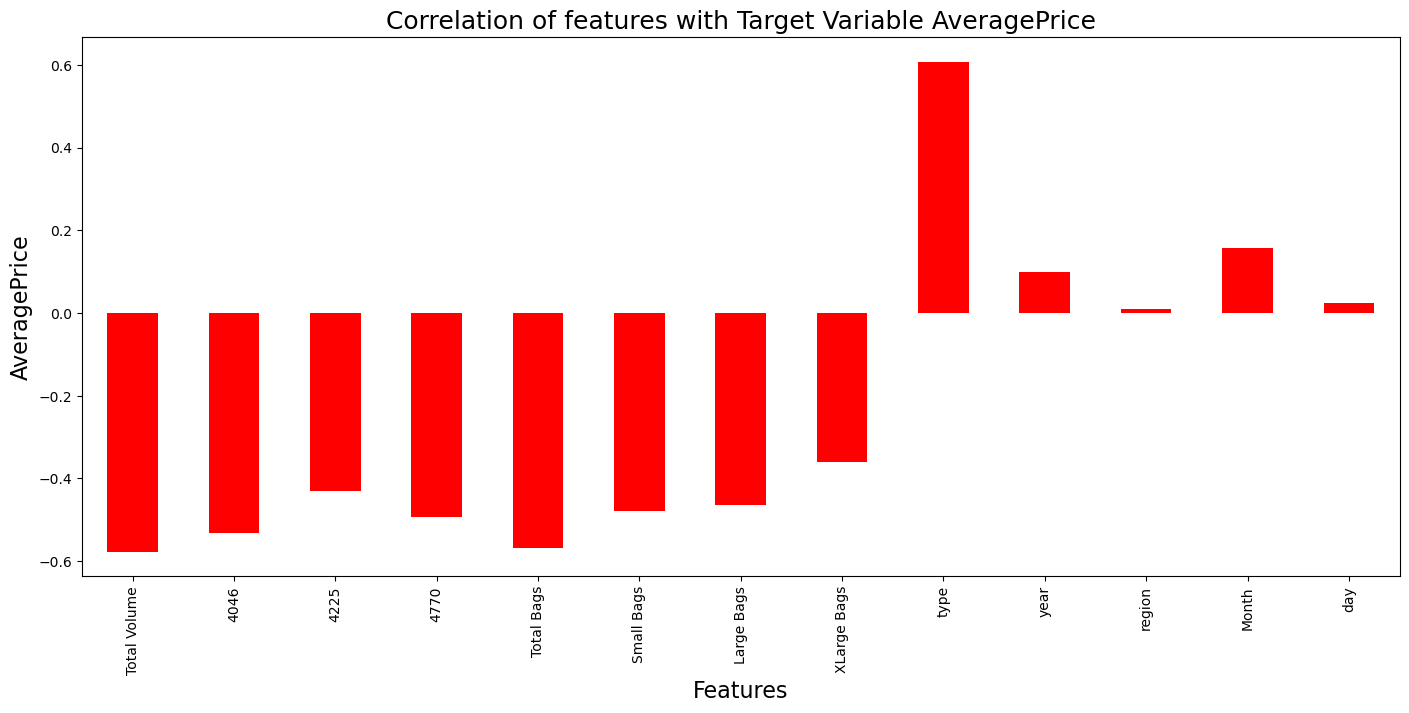

In [37]:
plt.figure(figsize = (17,7))
df1.corr()['AveragePrice'].drop(['AveragePrice']).plot(kind='bar',color = 'r')
plt.xlabel('Features',fontsize=16)
plt.ylabel('AveragePrice',fontsize=16)
plt.title('Correlation of features with Target Variable AveragePrice',fontsize = 18)
plt.show()

Comment-
we can observe the correlation of Dataset through this heatmap and bar garph.

'type', 'year','region' and 'day' have (+ive) correlation. Andrest of the columns have negative coorelation to column (Average Price) .

In [38]:
#Checking multicollinearity using Varience-inflation-factor (VIF)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif= pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
vif['Features'] = df1.columns
vif

,VIF,Features
0,27.330381,AveragePrice
1,1061.677224,Total Volume
2,47.804940,4046
3,114.256045,4225
4,9.179364,4770
5,479.525237,Total Bags
6,153.956418,Small Bags
7,11.767357,Large Bags
8,2.537963,XLarge Bags
9,8.206057,type


Comment - Here, we can see that column 'Xlarge Bags' , 'region', and 'day' have very less correlation to target variable. So we can drop it.

In [39]:
df1.drop([ 'XLarge Bags' , 'region', 'day'],axis=1,inplace=True)

In [40]:
df1.shape

(17782, 11)

In [41]:
df1.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,type,year,Month
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0,2015,12
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0,2015,12
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0,2015,12
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0,2015,12
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0,2015,11


In [42]:
X=df1.iloc[:,1:-1]
y=df1.iloc[:,0]

## Standard Scaling of Dataset

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

## ML Model Building

## Classifying The Types of Avocado

In [44]:
#spliting Data for Classification
X_= df1[['AveragePrice', '4046', '4225', '4770', 'Small Bags', 'Large Bags']]
Y=df1.type


In [45]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
18244    1
18245    1
18246    1
18247    1
18248    1
Name: type, Length: 17782, dtype: int64

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [47]:
for i in range(0,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X_,Y, test_size= 0.2, random_state=i )

In [48]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression model
lgr = LogisticRegression()
lgr.fit(X_train, Y_train)

pred = lgr.predict(X_test)

r4 = r2_score(Y_test, pred)

print('R2 Score for Logistic Regression test data is:', r4)

R2 Score for Logistic Regression test data is: 0.8076723384502914


Text(0.5, 1.0, 'Type Average Price in Each Region')

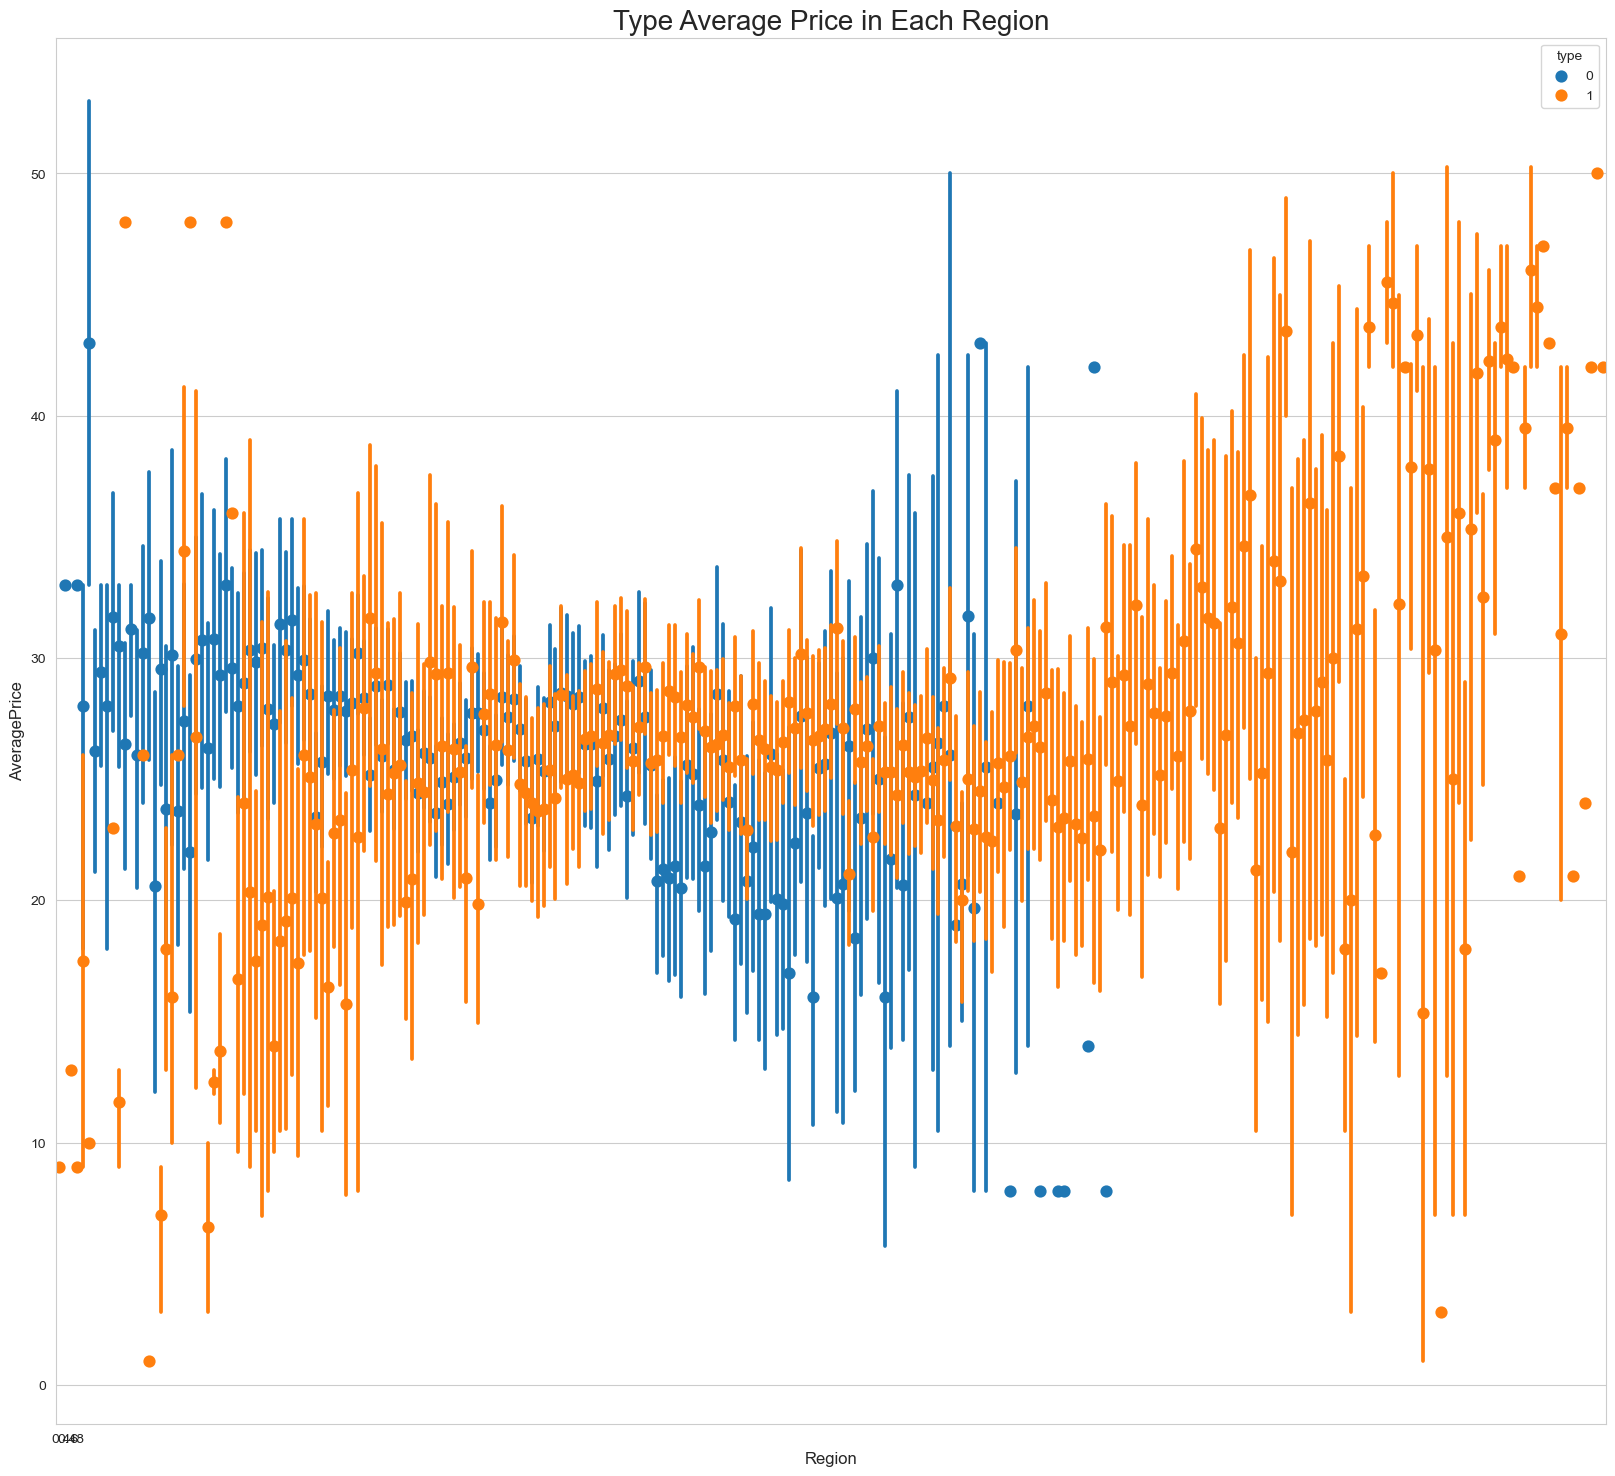

In [49]:
plt.figure(figsize=(20,18))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice', y='region', data=df, hue='type',join=False)
plt.xticks(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize' : 'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Type Average Price in Each Region",{'fontsize':20})

Based on Above Observation We Can Say That:

1.The Price of Organic Type of Avocado is high in HartfordSpringfield region and Sanfrancisco region.

2. And there is an average price (<1.50$) for Conventional Type of Avocado.
    
3. Organic type of avocado have the more price per unit then conventional.

## LinearRegression

In [51]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [52]:
maxR2_score=0
maxRS=0
for i in range(0,200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=i, test_size=.22)
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    R2=r2_score(y_test,y_pred)
    if R2>maxR2_score:
        maxR2_score=R2
        maxRS=i
        
print('Best R2 Score is: ', (maxR2_score)*100 ,'\nAt Random State: ', maxRS)

Best R2 Score is:  53.53000475458012 
At Random State:  146


## Random Forest Regressor

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

rfr=RandomForestRegressor()
# Fit the model
rfr.fit(X_train, y_train)

# Make predictions
pred_ = rfr.predict(X_test)

# Evaluate the model using regression metrics
mse = mean_squared_error(y_test, pred_)
r = r2_score(y_test, pred_)

print("Mean Squared Error:", mse)
print("R-squared:", r*100)

Mean Squared Error: 0.030146580966010725
R-squared: 80.9776393274387


## DecisionTreeRegressor

In [54]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [55]:
# Fit the model
dtr.fit(X_train, y_train)

pred2 = dtr.predict(X_test)

mse = mean_squared_error(y_test, pred2)
r2 = r2_score(y_test, pred2)

print("Mean Squared Error:", mse)
print("R-squared:", r2*100)

Mean Squared Error: 0.05904934832609251
R-squared: 62.74011959747368


## KNeighborsRegressor

In [56]:
from sklearn.neighbors import KNeighborsRegressor 
knn=KNeighborsRegressor()

In [57]:
knn.fit(X_train, y_train)

pred3 = knn.predict(X_test)

mse = mean_squared_error(y_test, pred3)
r3 = r2_score(y_test, pred3)

print("Mean Squared Error:", mse)
print("R-squared:", r3*100)

Mean Squared Error: 0.03390918476871965
R-squared: 78.60345279252859


## Prediction Based on Model

In [58]:
prediction_=pd.DataFrame({'predicted values':pred_,'actual values':y_test})
prediction_

,predicted values,actual values
877,1.1788,1.22
17474,1.6037,1.64
12217,1.5145,1.80
9002,1.3675,1.34
7744,1.3902,1.36
...,...,...
9226,1.7205,1.87
3749,0.9335,0.99
11152,1.9113,1.66
822,1.1265,1.04


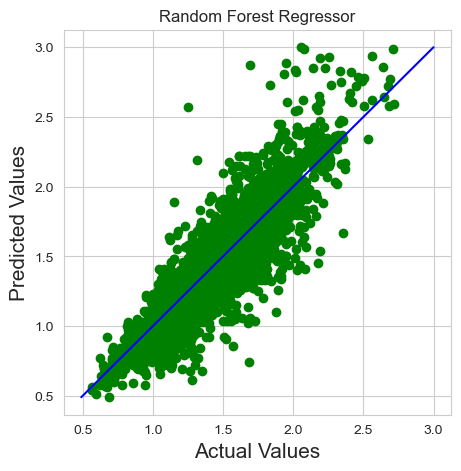

In [59]:
plt.figure(figsize=(5,5))
plt.scatter(pred_,y_test, c='g')
plt1 = max(max(pred_), max(y_test))
plt2 = min(min(pred_), min(y_test))
plt.plot([plt1, plt2], [plt1, plt2], 'b-')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.title("Random Forest Regressor")
plt.show()

conclusion -

1.The average price, total exchanges and the total volume are equally distributed among all the other columns.

2. So in this data set we are using both regression and classification technique for build this model.
    
3. RandomForestRegressor is the best performing model with 80.84% accuracy.

In [63]:
from sklearn.ensemble import RandomForestRegressor

# Create and train the model
model = RandomForestRegressor(n_estimators=100, max_depth=10)
model.fit(X_train, y_train)


RandomForestRegressor(max_depth=10)

## Saving Best Model

In [68]:
import joblib

# Save the model to a file
joblib.dump(model, 'avocado_model.joblib')

['avocado_model.joblib']